In [ ]:
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from  matplotlib.pyplot import quiver

In [ ]:
#file_name = '/Users/dananjayaliyanage/git/KTIso/fs_small_v2_fix_psi_animation/'
file_name= '/Users/dananjayaliyanage/git/KTIso/fs_0.5_v2_fix_psi_animation/'
labels = ['e_projection','ux_projection','uy_projection','e_diff_projection', 't00_projection']

In [ ]:
#energy=np.fromfile('/Users/dananjayaliyanage/git/KTIso/output/'+labels[0]+'_'+'0.010.dat', sep=" ").reshape(181,181)

In [4]:
#energy_new =np.multiply(energy,energy>0.1)

In [5]:
# Array for random sampling
sample_arr = [True, False, False, False, False, False]
# Create a numpy array with random True or False of size 10
thin_mask = []
for i in range(0,181):
    bool_arr = np.random.choice(sample_arr, size=181)
    thin_mask.append(bool_arr)
np.array(thin_mask).reshape(181,181)
#bool_arr = bool_arr.reshape(-1,1)
#thin_mask = np.repeat(bool_arr,181,1)
#thin_mask.shape

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False]])

<IPython.core.display.Javascript object>


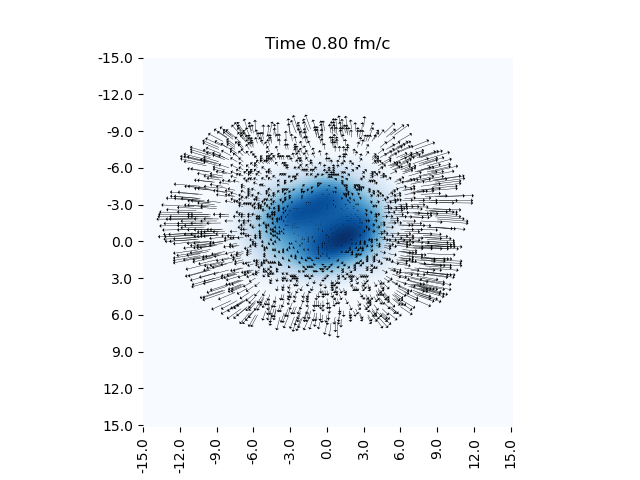

0.01
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.10
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.20
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.30
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.40
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.50
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.60
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.70
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.80
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.90
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.00
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.10
1.11
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.20
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.30
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.38
1.39
1.40
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.50


In [6]:
%matplotlib notebook
fig, ax = plt.subplots()

settick=np.linspace(0,180,11)
ticks=np.linspace(-15,15,11)
ticks=np.round(ticks,1)
ax.tick_params(axis='both')
ax.set_yticks(settick)
ax.set_xticks(settick)
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
#ax.set_xlim(60,120)
#ax.set_ylim(60,120)
# def init_fig():
#     ax.set_xlabel('X [fm]')
#     ax.set_ylabel('Y [fm]')
#     ax.tick_params(axis='both')
#     ax.set_yticks(settick)
#     ax.set_xticks(settick)
#     ax.set_xticklabels(ticks)
#     ax.set_yticklabels(ticks)
#     ax.set_xlim(60,120)
#     ax.set_ylim(60,120)

def load_frame(i):
    print(f'{i:.2f}')
    e = np.fromfile(file_name+labels[0]+'_'+f'{i:.2f}'+'0.dat', sep=" ").reshape(181,181)
    mask = e>0.01 # mask cells that have too small of an energy
    
    #np.multiply(energy,)
    t00 = np.fromfile(file_name+labels[4]+'_'+f'{i:.2f}'+'0.dat', sep=" ").reshape(181,181)
    #e_diff = np.fromfile(file_name+labels[3]+'_'+f'{i:.2f}'+'0.dat', sep=" ").reshape(181,181)
    ux = np.fromfile(file_name+labels[1]+'_'+f'{i:.2f}'+'0.dat', sep=" ").reshape(181,181)
    uy = np.fromfile(file_name+labels[2]+'_'+f'{i:.2f}'+'0.dat', sep=" ").reshape(181,181)
    ux = np.multiply(ux,mask)
    uy = np.multiply(uy,mask)
    sns.heatmap(e,ax=ax , square=True, cbar=False, cbar_kws={"shrink": .8}, cmap='Blues')
    x,y = np.meshgrid(np.arange(0,181),np.arange(0,181))
    #print(x.shape)
    
    ax.quiver(x[thin_mask],y[thin_mask],ux[thin_mask],-uy[thin_mask], units='x', pivot='tail', headwidth=10, width=0.20, headlength=5, minlength=0.0001)
    ax.set_title(f'Time {i:.2f} fm/c')
    ax.tick_params(axis='both')
    ax.set_yticks(settick)
    ax.set_xticks(settick)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)
import matplotlib.animation as anim
animator = anim.FuncAnimation(fig, load_frame , interval = 1, frames=np.linspace(0.01,1.5,150))
plt.show()

f = "FS_fix_psi_v2_0.5.gif" 
writergif = anim.PillowWriter(fps=20) 
animator.save(f, writer=writergif)
    #print(e.shape)
#plt.show()

In [ ]:
#f = "FS_fix_psi.mp4" 
#writervideo = matplotlib.animation.FFMpegWriter(fps=20) 
#animator.save(f, writer=writervideo, bitrate=1000)
#anim.save('test.mp4')

In [ ]:
load_frame(1.5)